# Applied Stochastics 

## with applications for security and privacy

## Lecture: Markov chains - Stationary distributions




## Markov chain

The process: random walk on a square.

State space: $V = \{v_1, v_2, v_3, v_4\}$.

Initial distribution $\mu = [0, 1, 0, 0]$

Transition graph

![Graph representation of the process](img/square-1.png)



Markov property / memoryless property

$P(X_{n+1} = i_{n+1} | X_0 = i_0, X_1 = i_1, \ldots, X_n = i_n) = P(X_{n+1} = i_{n+1} | X_{n} = i_n)$

Transition matrix 
$$P = \left(
\begin{array}{cccc}
 P_{1,1} & P_{1,2} & P_{1,3} & P_{1,4} \\
 P_{2,1} & P_{2,2} & P_{2,3} & P_{2,4} \\
 P_{3,1} & P_{3,2} & P_{3,3} & P_{3,4} \\
 P_{4,1} & P_{4,2} & P_{4,3} & P_{4,4} \\
\end{array}
\right)$$

Definition. Let $P$ be a $k \times k$ matrix $\{P_{i, j}: i, j = 1, \ldots, k\}.$

A random process $(X_0, X_1, \ldots)$ with finite state space $V = \{v_1, \ldots, v_k\}$ is
**a (homogeneous) Markov chain with transition matrix P** if for all $n$, and all $i, j \in \{1, \ldots, k\}$ and all $i_0, \ldots, i_{n-1} \in \{1, \ldots, k\}$ we have:
$$P(X_{n+1} = i_{n+1} | X_0 = i_0, X_1 = i_1, \ldots, X_{n-1} = i_{n-1}, X_n = i_n) = $$
$$ = P(X_{n+1} = i_{n+1} | X_{n} = i_n) = P_{i, j}$$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import math

## Transition matrix - interpretation

$P = \left(
\begin{array}{cccc}
 P_{1,1} & P_{1,2} & P_{1,3} & P_{1,4} \\
 P_{2,1} & P_{2,2} & P_{2,3} & P_{2,4} \\
 P_{3,1} & P_{3,2} & P_{3,3} & P_{3,4} \\
 P_{4,1} & P_{4,2} & P_{4,3} & P_{4,4} \\
\end{array}
\right)$

$P = \left(
\begin{array}{cccc}
 0 & \frac{1}{2} & 0 & \frac{1}{2} \\
 \frac{1}{2} & 0 & \frac{1}{2} & 0 \\
 0 & \frac{1}{2} & 0 & \frac{1}{2} \\
 \frac{1}{2} & 0 & \frac{1}{2} & 0 \\
\end{array}
\right)$

In [2]:
P = np.array([[0, .5, 0, .5],
              [.5, 0, .5, 0],
              [0, .5, 0, .5],
              [.5, 0, .5, 0]])

![RW](img/square-1.png)

## Matrix multiplication

In [3]:
x = np.array([0, 0, 0, 1])
r = np.dot(x, P)
print(str(r))
x = np.array([1, 0, 0, 0])
r = np.dot(x, P)
print(str(r))

[0.5 0.  0.5 0. ]
[0.  0.5 0.  0.5]


In [4]:
from numpy.linalg import matrix_power
r = np.dot(x, matrix_power(P,1))
print(str(r))
r = np.dot(x, matrix_power(P,2))
print(str(r))
r = np.dot(x, matrix_power(P,3))
print(str(r))


[0.  0.5 0.  0.5]
[0.5 0.  0.5 0. ]
[0.  0.5 0.  0.5]


## Distribution over time

For a Markov chain $(X_0, X_1, \ldots)$ with state space $\{s_1, \ldots, s_k\}$,
initial distribution $\mu^{(0)}$ and transition matrix $P$,
we have for any $n$ that the distribution $\mu^{(n)}$ at time $n$ satisfies
$$\mu^{(n)} = \mu^{(0)} P^n.$$

In [5]:
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0, 0, 0]]

## Example 1

In [6]:
for i in range(50):
  x = np.dot(x, P)
  print("step:\t" + str(i+1) + "\t" + str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

step:	1	[0.  0.5 0.  0.5]
step:	2	[0.5 0.  0.5 0. ]
step:	3	[0.  0.5 0.  0.5]
step:	4	[0.5 0.  0.5 0. ]
step:	5	[0.  0.5 0.  0.5]
step:	6	[0.5 0.  0.5 0. ]
step:	7	[0.  0.5 0.  0.5]
step:	8	[0.5 0.  0.5 0. ]
step:	9	[0.  0.5 0.  0.5]
step:	10	[0.5 0.  0.5 0. ]
step:	11	[0.  0.5 0.  0.5]
step:	12	[0.5 0.  0.5 0. ]
step:	13	[0.  0.5 0.  0.5]
step:	14	[0.5 0.  0.5 0. ]
step:	15	[0.  0.5 0.  0.5]
step:	16	[0.5 0.  0.5 0. ]
step:	17	[0.  0.5 0.  0.5]
step:	18	[0.5 0.  0.5 0. ]
step:	19	[0.  0.5 0.  0.5]
step:	20	[0.5 0.  0.5 0. ]
step:	21	[0.  0.5 0.  0.5]
step:	22	[0.5 0.  0.5 0. ]
step:	23	[0.  0.5 0.  0.5]
step:	24	[0.5 0.  0.5 0. ]
step:	25	[0.  0.5 0.  0.5]
step:	26	[0.5 0.  0.5 0. ]
step:	27	[0.  0.5 0.  0.5]
step:	28	[0.5 0.  0.5 0. ]
step:	29	[0.  0.5 0.  0.5]
step:	30	[0.5 0.  0.5 0. ]
step:	31	[0.  0.5 0.  0.5]
step:	32	[0.5 0.  0.5 0. ]
step:	33	[0.  0.5 0.  0.5]
step:	34	[0.5 0.  0.5 0. ]
step:	35	[0.  0.5 0.  0.5]
step:	36	[0.5 0.  0.5 0. ]
step:	37	[0.  0.5 0.  0.5]
step:	38	[

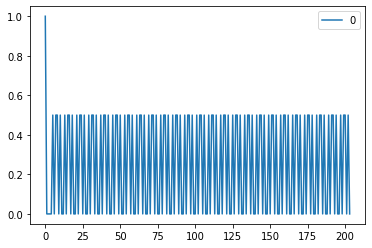

In [7]:
dfDistrHist.plot()
pyplot.show()

In [8]:
def d_tv(V, W):
    sum = 0
    for v, w in zip(V, W):
        sum = sum + abs(v-w)
    return sum/2

In [9]:
def unif(n):
    return [1/n] * n

In [10]:
print(str(unif(4)))
x = np.array([1,0,0,0])
r = np.dot(x, matrix_power(P,5))
print(str(r))
print(d_tv(r, unif(4)))

[0.25, 0.25, 0.25, 0.25]
[0.  0.5 0.  0.5]
0.5


In [11]:
x = np.array([1, 0, 0, 0])
r = np.dot(x, matrix_power(P,4))
print(d_tv(r, unif(4)))


0.5


## Aperiodicity

A Markov chain $(X_0, X_1, \ldots)$ with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. The **period** $d(s_i)$ of a state $s_i \in S$ is defined as
$$d(s_i) = \gcd\{n \geq 1 : (P^n)_{i,i} > 0\}.$$

The period of $s_i$ is the greatest common divisor of the set of times that the chain returns back to $s_i$, given that it started with $X_0 = s_i$.

If $d(s_i) = 1$ then the state $s_i$ is **aperiodic**.

*Definition* A Markov chain is said to be **aperiodic** if all its states are aperiodic. Otherwise the chain is said to be **periodic**.

## Example 1 - periodicity

A Markov chain $(X_0, X_1, \ldots)$ with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. The **period** $d(s_i)$ of a state $s_i \in S$ is defined as
$$d(s_i) = \gcd\{n \geq 1 : (P^n)_{i,i} > 0\}.$$

In [12]:
P = np.array([[0, .5, 0, .5],
              [.5, 0, .5, 0],
              [0, .5, 0, .5],
              [.5, 0, .5, 0]])

In [13]:
for i in range(1,5):
  x = matrix_power(P,i)
  print("\n%s\n%s" % (i, str(x)))



1
[[0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]]

2
[[0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]]

3
[[0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]]

4
[[0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]]


## Example 2

In [14]:
P = np.array([[1/2, 0, 1/2, 0, 0], 
              [0, 1/2, 1/2, 0, 0], 
              [1/4, 1/4, 0, 1/4, 1/4], 
              [0, 0, 1/2, 1/2, 0], 
              [0, 0, 1/2, 0, 1/2]])

In [15]:
x = np.array([[1.0, 0, 0, 0, 0]])
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0, 0, 0, 0]]


In [16]:
for i in range(50):
  x = np.dot(x, P)
  print(str(i+1) + "\t" + str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

1	[[0.5 0.  0.5 0.  0. ]]
2	[[0.375 0.125 0.25  0.125 0.125]]
3	[[0.25  0.125 0.375 0.125 0.125]]
4	[[0.21875 0.15625 0.3125  0.15625 0.15625]]
5	[[0.1875  0.15625 0.34375 0.15625 0.15625]]
6	[[0.1796875 0.1640625 0.328125  0.1640625 0.1640625]]
7	[[0.171875  0.1640625 0.3359375 0.1640625 0.1640625]]
8	[[0.16992188 0.16601562 0.33203125 0.16601562 0.16601562]]
9	[[0.16796875 0.16601562 0.33398438 0.16601562 0.16601562]]
10	[[0.16748047 0.16650391 0.33300781 0.16650391 0.16650391]]
11	[[0.16699219 0.16650391 0.33349609 0.16650391 0.16650391]]
12	[[0.16687012 0.16662598 0.33325195 0.16662598 0.16662598]]
13	[[0.16674805 0.16662598 0.33337402 0.16662598 0.16662598]]
14	[[0.16671753 0.16665649 0.33331299 0.16665649 0.16665649]]
15	[[0.16668701 0.16665649 0.33334351 0.16665649 0.16665649]]
16	[[0.16667938 0.16666412 0.33332825 0.16666412 0.16666412]]
17	[[0.16667175 0.16666412 0.33333588 0.16666412 0.16666412]]
18	[[0.16666985 0.16666603 0.33333206 0.16666603 0.16666603]]
19	[[0.16666794 0.

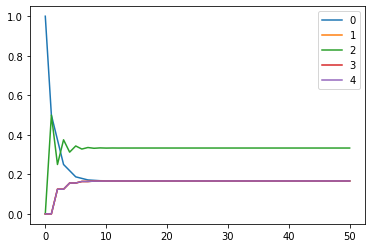

In [17]:
dfDistrHist.plot()
pyplot.show()

In [18]:
from numpy import linalg as LA

In [19]:
LA.eig(P)

(array([-0.5,  0.5,  1. ,  0.5,  0.5]),
 array([[ 3.53553391e-01, -8.66025404e-01,  4.47213595e-01,
         -1.01360607e-01,  0.00000000e+00],
        [ 3.53553391e-01,  2.88675135e-01,  4.47213595e-01,
         -7.77097985e-01,  0.00000000e+00],
        [-7.07106781e-01, -2.27101554e-17,  4.47213595e-01,
         -7.01777503e-17,  0.00000000e+00],
        [ 3.53553391e-01,  2.88675135e-01,  4.47213595e-01,
          4.39229296e-01, -7.07106781e-01],
        [ 3.53553391e-01,  2.88675135e-01,  4.47213595e-01,
          4.39229296e-01,  7.07106781e-01]]))

In [20]:
pi = np.array([1/6, 1/6, 1/3, 1/6, 1/6])

q = np.dot(pi, P)

print(pi)

print(q)

[0.16666667 0.16666667 0.33333333 0.16666667 0.16666667]
[0.16666667 0.16666667 0.33333333 0.16666667 0.16666667]


## Example 2 - periodicity

In [21]:
P = np.array([[1/2, 0, 1/2, 0, 0], 
              [0, 1/2, 1/2, 0, 0], 
              [1/4, 1/4, 0, 1/4, 1/4], 
              [0, 0, 1/2, 1/2, 0], 
              [0, 0, 1/2, 0, 1/2]])

In [22]:
for i in range(1,4):
  x = matrix_power(P,i)
  print("\n%s\n%s" % (i, str(x)))



1
[[0.5  0.   0.5  0.   0.  ]
 [0.   0.5  0.5  0.   0.  ]
 [0.25 0.25 0.   0.25 0.25]
 [0.   0.   0.5  0.5  0.  ]
 [0.   0.   0.5  0.   0.5 ]]

2
[[0.375 0.125 0.25  0.125 0.125]
 [0.125 0.375 0.25  0.125 0.125]
 [0.125 0.125 0.5   0.125 0.125]
 [0.125 0.125 0.25  0.375 0.125]
 [0.125 0.125 0.25  0.125 0.375]]

3
[[0.25   0.125  0.375  0.125  0.125 ]
 [0.125  0.25   0.375  0.125  0.125 ]
 [0.1875 0.1875 0.25   0.1875 0.1875]
 [0.125  0.125  0.375  0.25   0.125 ]
 [0.125  0.125  0.375  0.125  0.25  ]]


In [23]:
import math
p = math.gcd(2,3)
print(str(p))

1


## Irreducible Markov chains

State $s_i$ **communicates** with state $s_j$ (we denote it by $s_i \rightarrow s_j$) if there exists such an $n$ that 
$$P(X_{m+n} = s_j | X_m = s_i) > 0.$$

If $s_i \rightarrow s_j$ and $s_j \rightarrow s_i$ then states $s_i$ and $s_j$ **intercommunicate** (denoted by $s_i \leftrightarrow s_j$).

*Def.* A Markov chain $(X_0, X_1, \ldots)$ with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$ is said to be **irreducible** if for all $s_i, s_j \in S$ we have that $s_i \leftrightarrow s_j$. Otherwise the chain is said to be **reducible**.

## Example - reducibility

In [24]:
P = np.array([[1/2, 1/2,  0, 0], 
              [0.4, 0.6,  0, 0], 
              [0, 0, 1/4, 3/4], 
              [0, 0, 1/2, 1/2]])

In [25]:
for i in range(1,10):
  x = matrix_power(P,i)
  print("\n%s\n%s" % (i, str(x)))



1
[[0.5  0.5  0.   0.  ]
 [0.4  0.6  0.   0.  ]
 [0.   0.   0.25 0.75]
 [0.   0.   0.5  0.5 ]]

2
[[0.45   0.55   0.     0.    ]
 [0.44   0.56   0.     0.    ]
 [0.     0.     0.4375 0.5625]
 [0.     0.     0.375  0.625 ]]

3
[[0.445    0.555    0.       0.      ]
 [0.444    0.556    0.       0.      ]
 [0.       0.       0.390625 0.609375]
 [0.       0.       0.40625  0.59375 ]]

4
[[0.4445     0.5555     0.         0.        ]
 [0.4444     0.5556     0.         0.        ]
 [0.         0.         0.40234375 0.59765625]
 [0.         0.         0.3984375  0.6015625 ]]

5
[[0.44445    0.55555    0.         0.        ]
 [0.44444    0.55556    0.         0.        ]
 [0.         0.         0.39941406 0.60058594]
 [0.         0.         0.40039062 0.59960938]]

6
[[0.444445   0.555555   0.         0.        ]
 [0.444444   0.555556   0.         0.        ]
 [0.         0.         0.40014648 0.59985352]
 [0.         0.         0.39990234 0.60009766]]

7
[[0.4444445  0.5555555  0.         0.

## Example - continued

In [32]:
P = np.array([[1/2, 1/2,  0, 0], 
              [0.4, 0.6,  0, 0], 
              [0, 0, 1/4, 3/4], 
              [0, 0, 1/2, 1/2]])

In [33]:
x = np.array([[0, 1, 0, 0]])
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0, 0, 0]]

In [34]:
for i in range(50):
  x = np.dot(x, P)
  print(str(i+1) + "\t" + str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

1	[[0.4 0.6 0.  0. ]]
2	[[0.44 0.56 0.   0.  ]]
3	[[0.444 0.556 0.    0.   ]]
4	[[0.4444 0.5556 0.     0.    ]]
5	[[0.44444 0.55556 0.      0.     ]]
6	[[0.444444 0.555556 0.       0.      ]]
7	[[0.4444444 0.5555556 0.        0.       ]]
8	[[0.44444444 0.55555556 0.         0.        ]]
9	[[0.44444444 0.55555556 0.         0.        ]]
10	[[0.44444444 0.55555556 0.         0.        ]]
11	[[0.44444444 0.55555556 0.         0.        ]]
12	[[0.44444444 0.55555556 0.         0.        ]]
13	[[0.44444444 0.55555556 0.         0.        ]]
14	[[0.44444444 0.55555556 0.         0.        ]]
15	[[0.44444444 0.55555556 0.         0.        ]]
16	[[0.44444444 0.55555556 0.         0.        ]]
17	[[0.44444444 0.55555556 0.         0.        ]]
18	[[0.44444444 0.55555556 0.         0.        ]]
19	[[0.44444444 0.55555556 0.         0.        ]]
20	[[0.44444444 0.55555556 0.         0.        ]]
21	[[0.44444444 0.55555556 0.         0.        ]]
22	[[0.44444444 0.55555556 0.         0.        ]]

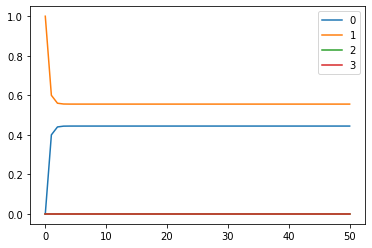

In [35]:
dfDistrHist.plot()
pyplot.show()

In [36]:
d_tv(x, unif(4))

array([0.09722222, 0.15277778, 0.125     , 0.125     ])

## Goal for today: long-teerm behavior of Markov chains.

For $(X_0, X_1, \ldots)$ what is the distribution of $X_n$ when $n \rightarrow \infty$?

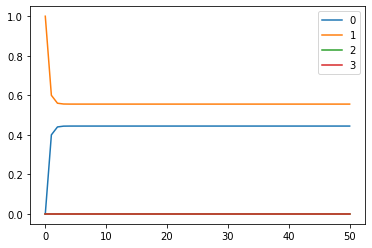

In [37]:
dfDistrHist.plot()
pyplot.show()

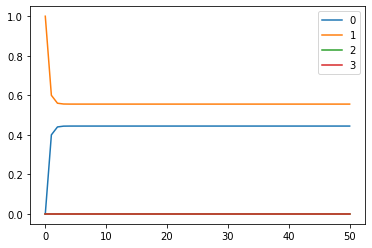

In [38]:
dfDistrHist.plot()
pyplot.show()

*Thm 4.1* Let $(X_0, X_1, \ldots)$ be a aperiodic Markov chain with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. Then there exists $N < \infty$ such that 
$$(P^n)_{i,i} > 0$$
for all $i \in \{1, \ldots, k\}$ and all $n \geq N$.

Distribution of $X_n$ converges if the Markov chain is irreducible and aperiodic.

Toss 1: W/E <- when they leave
Toss 2: W/E <- when they return
We want to find $P(X_{n+1} = (1, 3) | X_n = (2,2))$ 


* $P(WW) = 1/4$ $(2,2)\rightarrow (1,2) \rightarrow (2,2)$
* $P(WE) = 1/4$ $(2,2)\rightarrow (1,2) \rightarrow (1,3)$
* $P(EW) = 1/4$ $(2,2)\rightarrow (2,1) \rightarrow (3,1)$
* $P(EE) = 1/4$ $(2,2)\rightarrow (2,1) \rightarrow (2,2)$

When a person gets angry?

When $X_n = (0,4)$ and selects $W$ parking for leaving -> $P(X_n \& angry | X_n = (0,4)) = \frac{1}{2}$

Or when $X_n = (4,0)$ and selects $E$ parking for leaving $P(X_n \& angry | X_n = (4,0)) = \frac{1}{2}$

![asd](img/cars-4.svg)

![asd](img/cars-4.svg)

In [68]:
P = np.array([[0.5, .5 , 0, 0, 0],
              [.25, .5, .25, 0, 0],
              [0, .25, .5, .25, 0],
              [0, 0, .25, .5, .25],
              [0, 0, 0, .5, .5]])

In [72]:
print(str(matrix_power(P,4)))

[[0.2734375 0.4375    0.21875   0.0625    0.0078125]
 [0.21875   0.3828125 0.25      0.1171875 0.03125  ]
 [0.109375  0.25      0.28125   0.25      0.109375 ]
 [0.03125   0.1171875 0.25      0.3828125 0.21875  ]
 [0.0078125 0.0625    0.21875   0.4375    0.2734375]]


In [98]:
x = np.array([[1/8, 1/4, 1/4, 1/4, 1/8]])
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0, 0, 0, 0]]

In [99]:
for i in range(20):
  x = np.dot(x, P)
  print(str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]
[[0.125 0.25  0.25  0.25  0.125]]


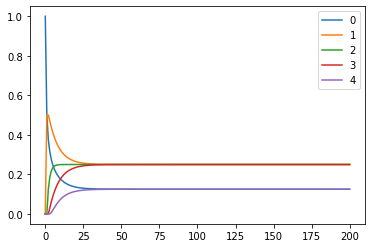

In [92]:
dfDistrHist.plot()
pyplot.show()

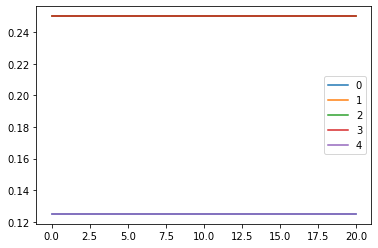

In [100]:
dfDistrHist.plot()
pyplot.show()

Lemma 4.1: Let $A = \{a_1, a_2, \ldots\}$ be a set of positive integers which is

* nonlattice, meaning that $\gcd\{a_1, a_2, \ldots\} = 1$, and
* closed under addition, meaning that if $a \in A$ and $a' \in A$ then $a + a' \in A$.

Then there exists an integer $N < \infty$ such that $n \in A$ for all $n \geq N$.

*Thm 4.1* Let $(X_0, X_1, \ldots)$ be a aperiodic Markov chain with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. Then there exists $N < \infty$ such that 
$$(P^n)_{i,i} > 0$$
for all $i \in \{1, \ldots, k\}$ and all $n \geq N$.

Corollary 4.1: Let $(X_0, X_1, \ldots)$ be an irreducible and aperiodic Markov chain with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. Then there exists an $M < \infty$ such that $(P^n)_{i,j} > 0$ for all $i, j \in \{1, \ldots, k\}$ and all $n \geq M$.

*Def 5.1* Let $(X_0, X_1, \ldots)$ be a Markov chain with state space $\{s_1, \ldots, s_k\}$ and transition matrix $P$. A row vector $\pi = (\pi_1, \ldots, \pi_k)$ is said to be a **stationary distribution** for the Markov chain, if it satisfies:

(i) $\pi_i \geq 0$ for $i = 1, \ldots, k$, and $\sum_{i=1}^k \pi_i = 1$, and 

(ii) $\pi P = \pi$, meaning that $\sum_{i=1}^k \pi_i P_{i, j} = \pi_j$ for $j = 1, \ldots, k$.

Property (i) means $\pi$ should describe a probability distribution on $\{s_1, \ldots, s_k\}$

Property (ii): if $\mu^{(0)} = \pi$ then $\mu^{(1)}$:    

$$\mu^{(1)} = \mu^{(0)} P = \pi P = \pi$$

so $\mu^{(n)} = \pi$ for every $n$.

Goals for today:

* **existence** of stationary distributions,
* **uniqueness** of stationary distributions,
* **convergence** to stationary starting from any initial distribution.

**Theorem 5.1 (Existence of stationary distributions)** For any irreducible and aperiodic Markov chain, there exists at least one stationary distribution.

*Def.* Let $(X_0, X_1, \ldots)$ be a Markov chain  with state space $\{s_1, \ldots, s_k\}$ and transition matrix $P$. If the initial distribution $P(X_0 = s_i) = 1$ then 

$$T_{i,j} = \min\{n\geq 1: X_n = s_j\}$$

is called **hitting time**.

If the Markov chain never visits $s_j$ then $T_{i,j} = \infty$.

The **mean hitting time** is defined as

$$\tau_{i,j} = E[T_{i,j}]$$.

The **mean return time** is $\tau_{i,i}$.

*Lemma 5.1* For any irreducible aperiodic Markov chain with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$, we have for any two states $s_i, s_j \in S$ that if the chain starts in state $s_i$, then

$$P(T_{i,j} < \infty) = 1.$$

Moreover, the mean hitting time $\tau_{i,j}$ is finite, *i.e.,*

$$E[T_{i,j}] < \infty.$$

Proof: By Corollary 4.1: there exists $M < \infty$ such that $(P^M)_{i,j} > 0$ for all $i, j \in \{1, \ldots, k\}$.

Fix $M$, set $\alpha = \min\{(P^M)_{i,j} : i, j \in \{1, \ldots, k\}\}$ and note that $\alpha > 0$.

Fix two states $s_i$ and $s_j$ as in the lemma, and suppose that the chain starts in $s_i$ (P(X_0 = s_i) = 1$:
$$P(T_{i,j} > M) \leq P(X_M \neq s_j) \leq 1 - \alpha.$$

So: $P(T_{i, j} > 2M) = P(T_{i,j} > M) P(T_{i,j} > 2M | T_{i,j} > M)$

$\leq P(T_{i,j} > M) P(X_{2M} \neq s_j | T_{i,j} > M)$

$\leq (1-\alpha)^2$.

Iterating above argument, we get: 
$$P(T_{i, j} > l M) = P(T_{i,j} > M) P(T_{i,j} > 2M | T_{i,j} > M) \ldots P(T_{i,j} > lM | T_{i,j} > (l-1) M)$$

$\leq (1-\alpha)^l$  which tends to $0$ as $l \rightarrow \infty$

Therefore $P(T_{i,j} = \infty) = 0$.

Proof (part 2): $$E[T_{i,j}] = \sum_{n=1}^{\infty} P(T_{i,j} \geq n) = \sum_{n=0}^{\infty} P(T_{i,j} > n)$$

$$=\sum_{l=0}^{\infty} \sum_{n = l M}^{(l+1)M - 1} P(T_{i,j} > n)$$

$$\leq \sum_{l=0}^{\infty} \sum_{n = l M}^{(l+1)M - 1} P(T_{i,j} > l M) = M \sum_{l=0}^{\infty} P(T_{i,j} > lM)$$

$$\leq M \sum_{l=0}^{\infty} (1-\alpha)^l = M \frac{1}{1-(1-\alpha)} = \frac{M}{\alpha} < \infty.$$



*Definition 5.2* If $v^{(1)} = (v_1^{(1)}, \ldots, v_k^{(1)})$ and $v^{(2)} = (v_1^{(2)}, \ldots, v_k^{(2)})$ are probability distributions on $S = \{s_1, \ldots, s_k\}$ then we define the **total variation distance** between $v^{(1)}$ and $v^{(2)}$ as
$$d_{TV}(v^{(1)}, v^{(2)}) = \frac{1}{2} \sum_{i=1}^k |v_i^{(1)} - v_i^{(2)}|.$$

If $v^{(1)}, v^{(2)}, \ldots$ and $v$ are probability distributions on $S$ then we say that $v^{(n)}$ **converges to** $v$ **in total variation as** $n \rightarrow \infty$, writing $v^{(n)} \xrightarrow{TV} v$, if
$$\lim_{n\rightarrow \infty} d_{TV}(v^{(n)}, v) = 0.$$

$d_{TV}(v^{(1)}, v^{(2)}) = \frac{1}{2} \sum_{i=1}^k |v_i^{(1)} - v_i^{(2)}|.$

Fact 1: If $d_{TV}(v^{(1)}, v^{(2)}) = 0$ then $v^{(1)} = v^{(2)}$

Fact 2: If $d_{TV}(v^{(1)}, v^{(2)}) = 1$ then supports of $v^{(1)}$ and $v^{(2)}$ are disjoint.

Fact 3: 
$$d_{TV}(v^{(1)}, v^{(2)}) = \max_{A \subset S}|v^{(1)}(A) - v^{(2)}(A)|$$

## Example - RC4

In [86]:
n = 256
P = np.array([[1/n, 1-1/n], 
              [1-1/n, 1/n]])

In [91]:
x = np.array([[1, 0]])
stateHist = x
dfStateHist = pd.DataFrame(x)
distr_hist = [[0, 0]]

In [92]:
for i in range(1024):
  x = np.dot(x, P)
  print(str(i+1) + "\t" + str(x))
  stateHist = np.append(stateHist, x, axis=0)
  dfDistrHist = pd.DataFrame(stateHist)

1	[[0.00390625 0.99609375]]
2	[[0.99221802 0.00778198]]
3	[[0.01162744 0.98837256]]
4	[[0.98455715 0.01544285]]
5	[[0.01922845 0.98077155]]
6	[[0.97701552 0.02298448]]
7	[[0.02671116 0.97328884]]
8	[[0.96959127 0.03040873]]
9	[[0.03407741 0.96592259]]
10	[[0.96228257 0.03771743]]
11	[[0.04132901 0.95867099]]
12	[[0.95508762 0.04491238]]
13	[[0.04846775 0.95153225]]
14	[[0.94800465 0.05199535]]
15	[[0.05549539 0.94450461]]
16	[[0.94103192 0.05896808]]
17	[[0.06241364 0.93758636]]
18	[[0.93416772 0.06583228]]
19	[[0.06922422 0.93077578]]
20	[[0.92741035 0.07258965]]
21	[[0.0759288 0.9240712]]
22	[[0.92075815 0.07924185]]
23	[[0.08252903 0.91747097]]
24	[[0.91420948 0.08579052]]
25	[[0.08902653 0.91097347]]
26	[[0.90776274 0.09223726]]
27	[[0.09542291 0.90457709]]
28	[[0.90141633 0.09858367]]
29	[[0.10171973 0.89828027]]
30	[[0.8951687 0.1048313]]
31	[[0.10791855 0.89208145]]
32	[[0.88901831 0.11098169]]
33	[[0.11402089 0.88597911]]
34	[[0.88296365 0.11703635]]
35	[[0.12002826 0.87997174]

325	[[0.46092138 0.53907862]]
326	[[0.53877331 0.46122669]]
327	[[0.4615296 0.5384704]]
328	[[0.53816985 0.46183015]]
329	[[0.46212835 0.53787165]]
330	[[0.53757577 0.46242423]]
331	[[0.46271779 0.53728221]]
332	[[0.53699095 0.46300905]]
333	[[0.46329805 0.53670195]]
334	[[0.53641522 0.46358478]]
335	[[0.46386927 0.53613073]]
336	[[0.53584846 0.46415154]]
337	[[0.46443161 0.53556839]]
338	[[0.53529051 0.46470949]]
339	[[0.4649852 0.5350148]]
340	[[0.53474125 0.46525875]]
341	[[0.46553017 0.53446983]]
342	[[0.53420054 0.46579946]]
343	[[0.46606665 0.53393335]]
344	[[0.53366824 0.46633176]]
345	[[0.46659479 0.53340521]]
346	[[0.53314423 0.46685577]]
347	[[0.46711471 0.53288529]]
348	[[0.53262838 0.46737162]]
349	[[0.46762653 0.53237347]]
350	[[0.53212055 0.46787945]]
351	[[0.46813039 0.53186961]]
352	[[0.53162063 0.46837937]]
353	[[0.46862641 0.53137359]]
354	[[0.53112848 0.46887152]]
355	[[0.46911471 0.53088529]]
356	[[0.530644 0.469356]]
357	[[0.46959541 0.53040459]]
358	[[0.53016706 0

657	[[0.49710889 0.50289111]]
658	[[0.50286852 0.49713148]]
659	[[0.49715389 0.50284611]]
660	[[0.50282388 0.49717612]]
661	[[0.49719818 0.50280182]]
662	[[0.50277993 0.49722007]]
663	[[0.49724179 0.50275821]]
664	[[0.50273666 0.49726334]]
665	[[0.49728472 0.50271528]]
666	[[0.50269407 0.49730593]]
667	[[0.49732698 0.50267302]]
668	[[0.50265214 0.49734786]]
669	[[0.49736858 0.50263142]]
670	[[0.50261086 0.49738914]]
671	[[0.49740954 0.50259046]]
672	[[0.50257022 0.49742978]]
673	[[0.49744986 0.50255014]]
674	[[0.50253022 0.49746978]]
675	[[0.49748955 0.50251045]]
676	[[0.50249084 0.49750916]]
677	[[0.49752862 0.50247138]]
678	[[0.50245207 0.49754793]]
679	[[0.49756708 0.50243292]]
680	[[0.50241391 0.49758609]]
681	[[0.49760495 0.50239505]]
682	[[0.50237634 0.49762366]]
683	[[0.49764223 0.50235777]]
684	[[0.50233935 0.49766065]]
685	[[0.49767892 0.50232108]]
686	[[0.50230294 0.49769706]]
687	[[0.49771505 0.50228495]]
688	[[0.5022671 0.4977329]]
689	[[0.49775061 0.50224939]]
690	[[0.5022

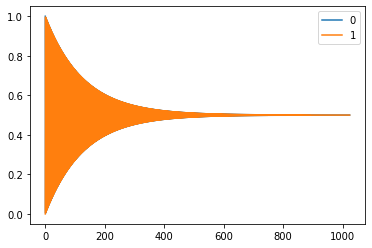

In [93]:
dfDistrHist.plot()
pyplot.show()

In [95]:
x = [1,0]
r = np.dot(x, matrix_power(P,2048))
d_tv(r, unif(2))



5.2841200970377145e-08

**Theorem 5.2 (The Markov chain convergence theorem)** Let $(X_0, X_1, \ldots)$ be an irreducible aperiodic Markov chain with state space $S = \{s_1, \ldots, s_k\}$, transition matrix $P$, and arbitrary initial distribution $\mu^{(0)}$. Then for any distribution $\pi$ which is stationary for the transition matrix $P$, we have 
$$\mu^{(n)} \xrightarrow{TV} \pi.$$

**Theorem 5.3 (Uniqueness of the stationary distribution)** Any irreducible and aperiodic Markov chain has exactly one stationary distribution.

**Theorem 5.2 (The Markov chain convergence theorem)** Let $(X_0, X_1, \ldots)$ be an irreducible aperiodic Markov chain with state space $S = \{s_1, \ldots, s_k\}$, transition matrix $P$, and arbitrary initial distribution $\mu^{(0)}$. Then for any distribution $\pi$ which is stationary for the transition matrix $P$, we have 
$$\mu^{(n)} \xrightarrow{TV} \pi.$$

**Definition 6.1** Let $(X_0, X_1, \ldots)$ be a Markov chain with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. A probability distribution $\pi$ on $S$ is said to be **reversible** for the chain (of for the transition matrix $P$) if for all $i, j \in \{1, \ldots, k\}$ we have 
$$\pi_i P_{i, j} = \pi_j P_{j,i}.$$
The Markov chain is said to be reversible if there exists a reversible distribution for it.

**Theorem 6.1** Let $(X_0, X_1, \ldots)$ be a Markov chain with state space $S = \{s_1, \ldots, s_k\}$ and transition matrix $P$. If $\pi$ is a reversible distribution for the chain, then it is also a stationary distribution for the chain.

Proof: we need to show that:
$$\pi_j = \sum_{i=1}^k \pi_i P_{i, j}$$

$$\pi_j = \pi_j 1 = \pi_j \sum_{i=1}^k P_{j,i} = \sum_{i=1}^k \pi_j P_{j,i} = \sum_{i=1}^k \pi_i P_{i,j}$$

**Example: Random walks on graphs**

![graph](img/graph.png)

In [35]:
P = np.array([[0,1,1,1,0,0],
[1,0,1,1,1,0],
[1,1,0,1,1,1],
[1,1,1,0,1,1],
[0,1,1,1,0,1],
[0,0,1,1,1,0]]
)

In [38]:
from numpy import linalg as LA
LA.eigvals(P)


array([ 4.11902668,  0.61803399, -0.43162711, -1.68739956, -1.61803399,
       -1.        ])